In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Load saved credentials
service = QiskitRuntimeService(name="xuy")

In [4]:
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, EstimatorV2 as Estimator
from qiskit.visualization import  plot_histogram

 
# Bell Circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
 
# Run the sampler job locally using ibm_cleveland
backend = service.backend("ibm_cleveland")
estimator = Estimator(backend)
sampler = Sampler(backend)

n_qubits = 2
observable = SparsePauliOp("Z" * n_qubits)
qc.measure_all()

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)
isa_observable = observable.apply_layout(isa_qc.layout) 


 #Run sampler
result_sam = sampler.run([isa_qc]).result()
pub_result = result_sam[0]
#Get the counts from result_sam
counts = pub_result.data.meas.get_counts()  # Get the counts dictionary

#Run estimator
job_est = estimator.run([(isa_qc, isa_observable)])
result_est = job_est.result()

print(f"job id: {job.job_id()}")


# Print the measurement counts
print("Measurement Counts:")
print(counts)


# Visualize the measurement counts as a histogram
plot_histogram(counts)


 # Print the Expectation value
print(f" > Expectation value: {result_est[0].data.evs}")
print(f" > Metadata: {result_est[0].metadata}")



base_runtime_job._start_websocket_client:WARNING:2024-04-18 08:57:29,955: An error occurred while streaming results from the server for job crg59yz69sp0008qfzgg:
Traceback (most recent call last):
  File "/Users/xuy/.conda/envs/QC/lib/python3.8/site-packages/qiskit_ibm_runtime/base_runtime_job.py", line 311, in _start_websocket_client
    self._ws_client.job_results()
  File "/Users/xuy/.conda/envs/QC/lib/python3.8/site-packages/qiskit_ibm_runtime/api/clients/runtime_ws.py", line 70, in job_results
    self.stream(url=url, retries=max_retries, backoff_factor=backoff_factor)
  File "/Users/xuy/.conda/envs/QC/lib/python3.8/site-packages/qiskit_ibm_runtime/api/clients/base_websocket_client.py", line 222, in stream
    raise WebsocketError(error_message)
qiskit_ibm_runtime.api.exceptions.WebsocketError: 'Max retries exceeded: Failed to establish a websocket connection. Error: Traceback (most recent call last):\n  File "/Users/xuy/.conda/envs/QC/lib/python3.8/site-packages/websocket/_http.p

RequestsApiError: 'HTTPSConnectionPool(host=\'api.quantum.ibm.com\', port=443): Max retries exceeded with url: /runtime/jobs/crg59yz69sp0008qfzgg?exclude_params=true (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7fc6d6defb20>: Failed to resolve \'api.quantum.ibm.com\' ([Errno 8] nodename nor servname provided, or not known)"))'

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
name = "xuy"
)
job = service.job('crg59yz69sp0008qfzgg')
job_result = job.result()

for idx, pub_result in enumerate(job_result):
    print(f"Sample data for pub {idx}: {pub_result.data.meas.get_counts()}")

Sample data for pub 0: {'01': 21, '00': 2063, '11': 1981, '10': 31}


In [2]:
print(job_result)

PrimitiveResult([PubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=4096, num_bits=2>), meas2=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'version': 2})


Measurement Counts:
{'01': 21, '00': 2063, '11': 1981, '10': 31}


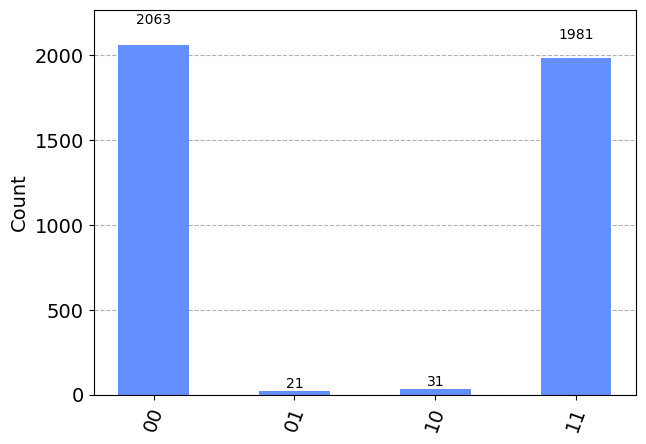

In [3]:
from qiskit.visualization import  plot_histogram

#Get the counts from result_sam
counts = pub_result.data.meas.get_counts()  # Get the counts dictionary

# Print the measurement counts
print("Measurement Counts:")
print(counts)

# Visualize the measurement counts as a histogram
plot_histogram(counts)


In [4]:
print (job_result)

PrimitiveResult([PubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=4096, num_bits=2>), meas2=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'version': 2})


Measurement Counts:
{'01': 48, '00': 2063, '11': 1938, '10': 47}


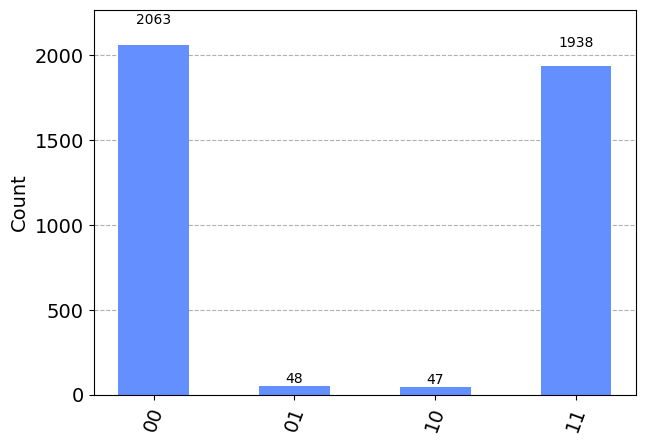

In [7]:
counts2 = pub_result.data.meas2.get_counts()


# Print the measurement counts
print("Measurement Counts:")
print(counts2)

# Visualize the measurement counts as a histogram
plot_histogram(counts2)


In [11]:
import numpy as np


bit_arrays = primitive_result.data


# Assuming the first BitArray contains the measurement results
bit_array = bit_arrays[0]

# Calculate the number of 0s and 1s in the measurement results
num_zeros = np.sum(bit_array == 0)
num_ones = np.sum(bit_array == 1)

# Calculate the expectation value as the average of 0s and 1s
# (0 is treated as -1, and 1 is treated as +1)
expectation_value = (num_ones - num_zeros) / len(bit_array)

NameError: name 'primitive_result' is not defined